<a href="https://colab.research.google.com/github/csmotherman/CSC302-Midterm/blob/main/CSC202_Group_2_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**

* **What are the primary causes contributing to sleep disorders?**
* Do age and gender play a factor in sleep disorders?
* Does your job and stress affect the quality of sleep?
* How do sleeping habits affect sleeping disorders?
* How are weight and physical activity correlated with sleep disorders?




**Importing Packages**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading in dataset**

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [15]:
print('Number of Males: ' ,len(df[df['Gender'] == 'Male']))
print('Number of Females: ' ,len(df[df['Gender'] == 'Female']))

Number of Males:  189
Number of Females:  185


**Age and Gender**

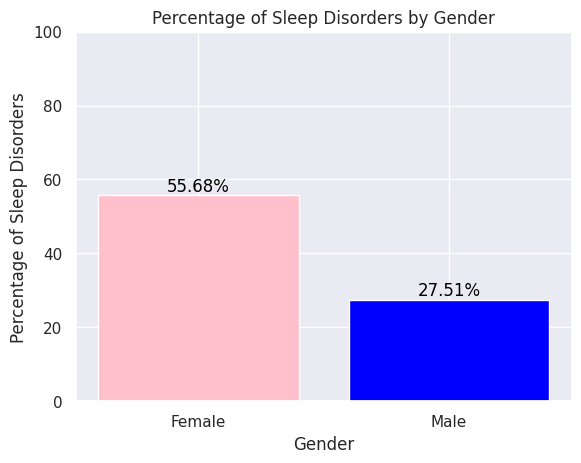

In [16]:
# Create a copy so that we do not change any values in the main data frame
temp_df = df.copy()

# Calculating whether they have a sleep disorder or not, so convert to binary values
temp_df['Sleep Disorder'].replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1}, inplace=True)

# Calculate the percentage of individuals with sleep disorders for each gender
groups = temp_df.groupby('Gender')['Sleep Disorder']
gender_sleep_disorder_percentage = 100*groups.sum()/groups.count()

# Plot a bar graph based on the percentage of each genders that have a disorder
bars = plt.bar(gender_sleep_disorder_percentage.index, gender_sleep_disorder_percentage, color=['pink', 'blue'])
male_pct_str = str(round(gender_sleep_disorder_percentage['Male'],2)) + '%'
female_pct_str = str(round(gender_sleep_disorder_percentage['Female'],2)) + '%'
plt.bar_label(bars, labels=[female_pct_str,male_pct_str], color='black')
plt.title('Percentage of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sleep Disorders')
plt.ylim(0, 100)
plt.show()


In [17]:
#See if there are any occupation that don't have a valid amount of data
print(df['Occupation'].value_counts())

#Take out any data that has less than 10 rows of data
clean_df = df[df['Occupation'] != 'Manager']
clean_df = clean_df[clean_df['Occupation'] != 'Scientist']
clean_df = clean_df[clean_df['Occupation'] != 'Sales Representative']
clean_df = clean_df[clean_df['Occupation'] != 'Software Engineer']
clean_df = clean_df[clean_df['Occupation'] != 'Salesperson']
print(clean_df['Occupation'].value_counts())
clean_df



Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
Nurse         73
Doctor        71
Engineer      63
Lawyer        47
Teacher       40
Accountant    37
Name: Occupation, dtype: int64


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Text(0.5, 1.05, 'Distribution of Age by Sleep Disorder and Gender')

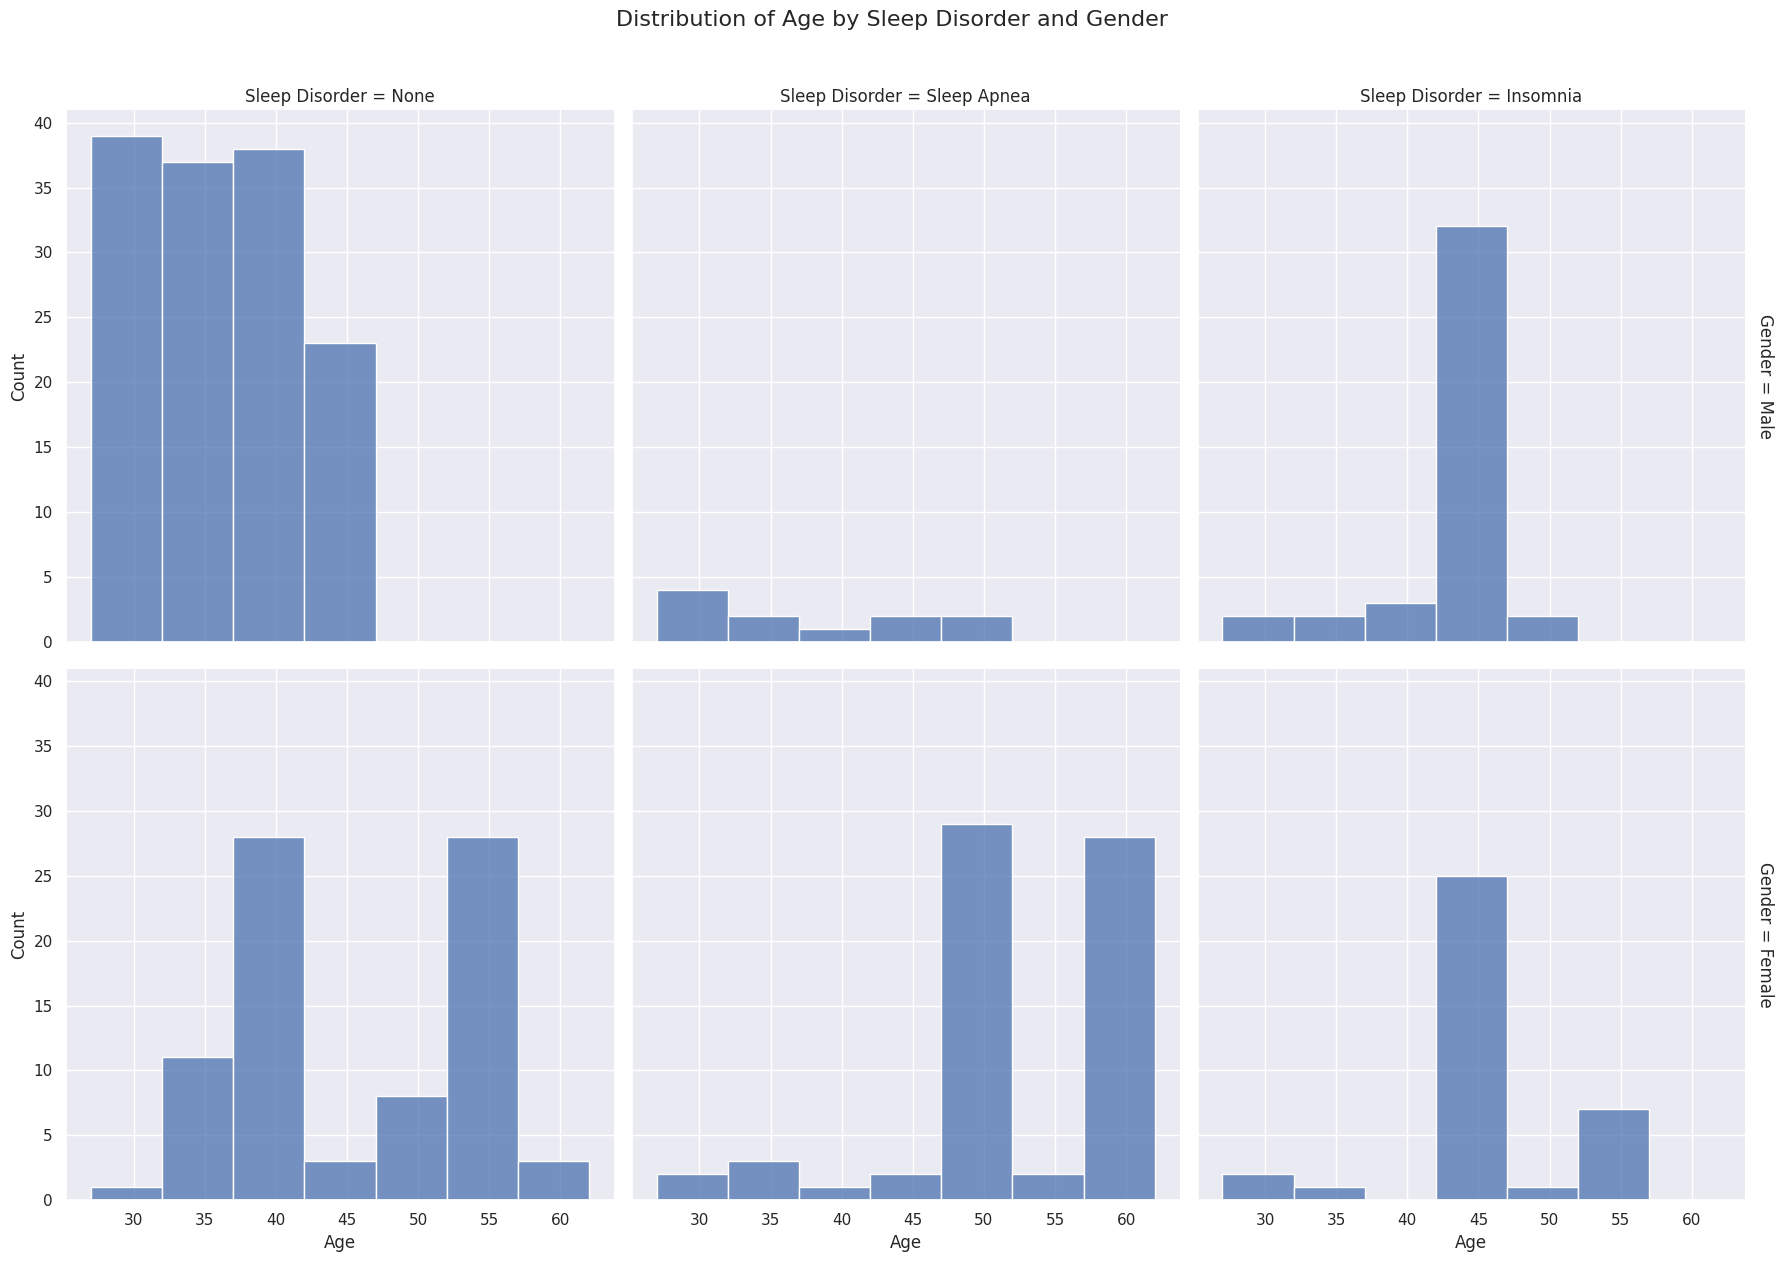

In [18]:
sns.set_theme(style="darkgrid")
plot = sns.displot(
    df, x="Age", col="Sleep Disorder", row="Gender",
    binwidth=5, height=6, facet_kws=dict(margin_titles=True),
)
plot.set_xlabels(label="Age", fontsize=12)
plot.set_ylabels(label="Count", fontsize=12)
plot.fig.suptitle("Distribution of Age by Sleep Disorder and Gender", y=1.05, fontsize=16)

**Occupation and Stress Levels**

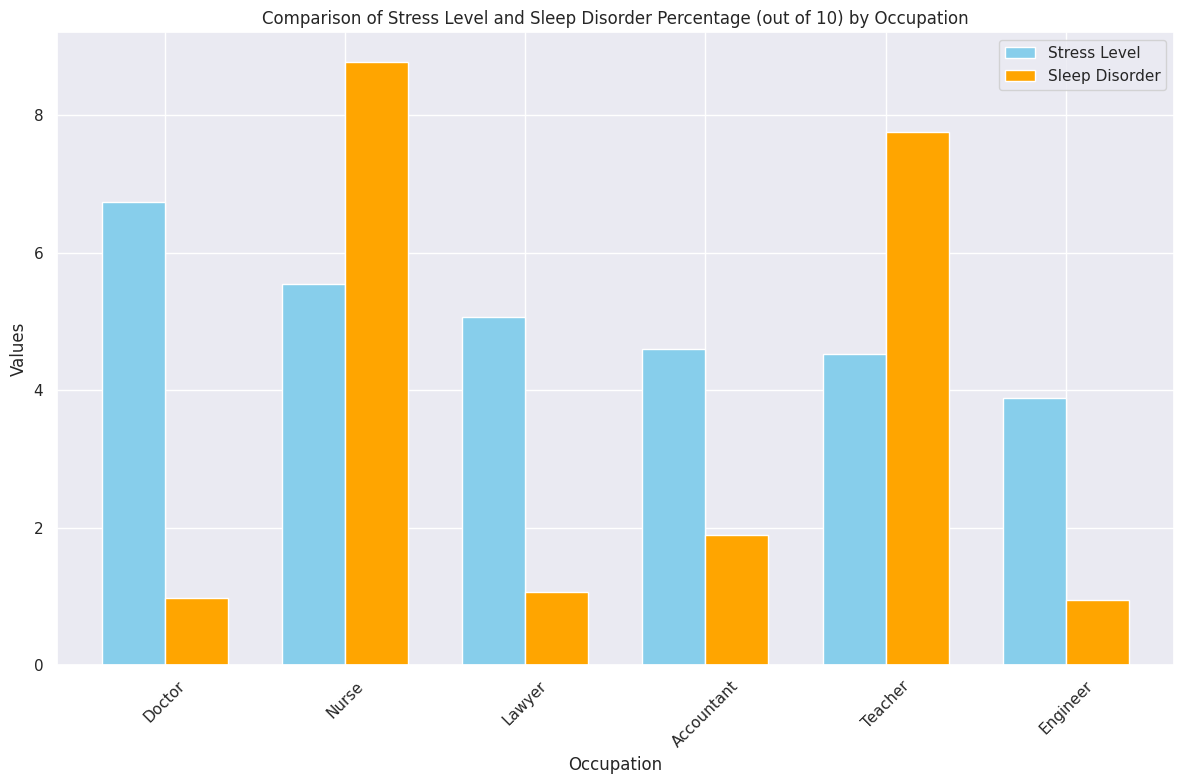

In [19]:
grouped_df = clean_df.copy()
grouped_df['Sleep Disorder'].replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1}, inplace=True)
stress_df = clean_df.groupby('Occupation')['Stress Level'].mean()
occupation_disorder = grouped_df.groupby('Occupation')['Sleep Disorder'].mean() * 10
group = pd.concat([stress_df, occupation_disorder], axis=1).sort_values(by = 'Stress Level', ascending = False)

group.plot(kind='bar', width=0.7, color=['skyblue', 'orange'], figsize=(12, 8))
plt.xlabel('Occupation')
plt.ylabel('Values')
plt.title('Comparison of Stress Level and Sleep Disorder Percentage (out of 10) by Occupation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Stress Levels by Sleep Disorder')

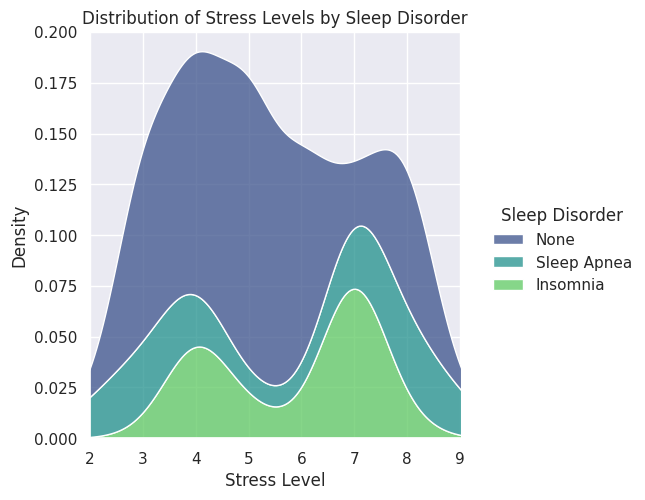

In [20]:
sns.displot(data=df, x="Stress Level", hue="Sleep Disorder", fill=True, multiple="stack", kind="kde", palette="viridis")
plt.xlim(2, 9)
plt.xlabel('Stress Level')
plt.ylabel('Density')
plt.title('Distribution of Stress Levels by Sleep Disorder')

**Sleep Duration & Quality**

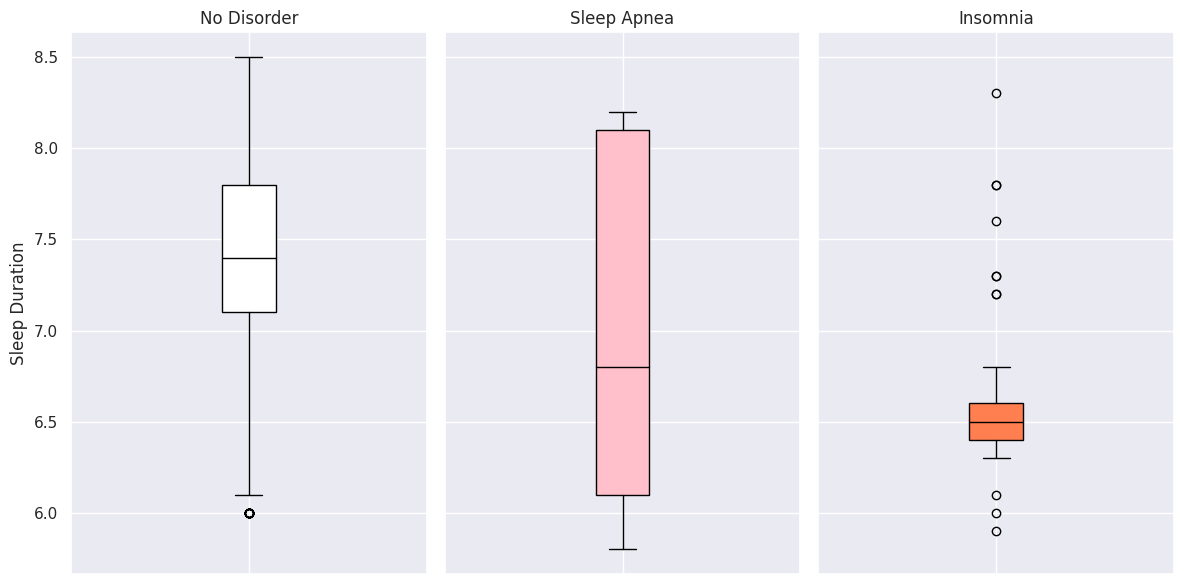

In [21]:
#Split data by sleep disorder
sleep_apnea_df = df[df['Sleep Disorder'] == 'Sleep Apnea']
insomnia_df = df[df['Sleep Disorder'] == 'Insomnia']
none_df = df[df['Sleep Disorder'] == 'None']

# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Boxplot for 'None' sleep disorder, used same code for each disorder
axes[0].boxplot(none_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='white'), medianprops=dict(color='black'))
axes[0].set_title('No Disorder')
axes[0].set_xticklabels('')


axes[1].boxplot(sleep_apnea_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='pink'), medianprops=dict(color='black'))
axes[1].set_title('Sleep Apnea')
axes[1].set_xticklabels('')


axes[2].boxplot(insomnia_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='coral'), medianprops=dict(color='black'))
axes[2].set_title('Insomnia')
axes[2].set_xticklabels('')

# Set a common ylabel for all subplots
axes[0].set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()


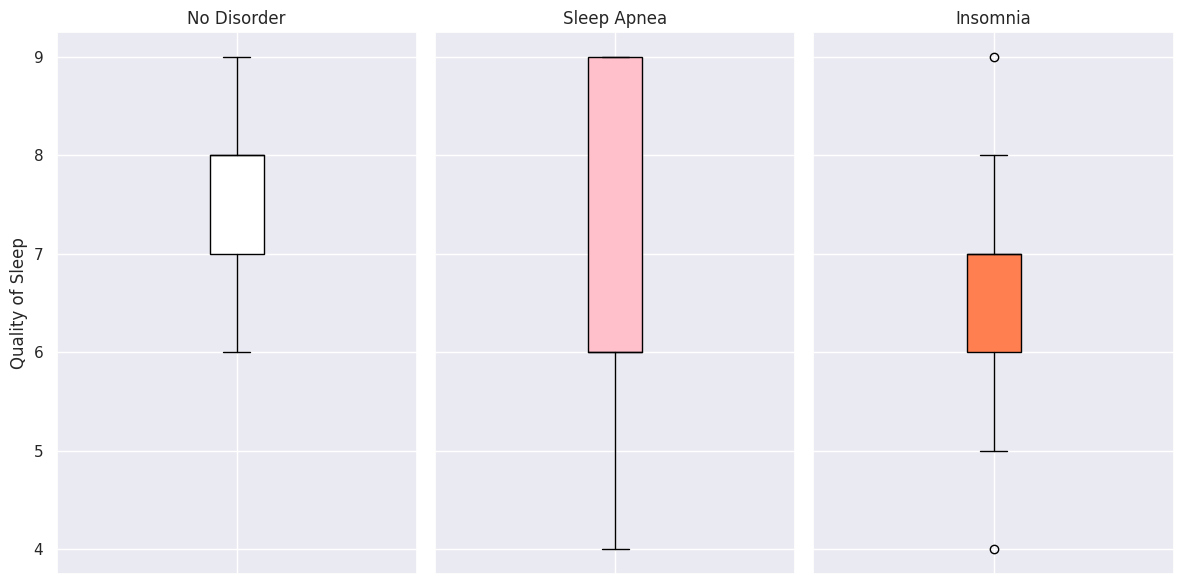

In [22]:

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Boxplot for 'None' sleep disorder
axes[0].boxplot(none_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='white'), medianprops=dict(color='black'))
axes[0].set_title('No Disorder')
axes[0].set_xticklabels('')


# Boxplot for 'Sleep Apnea' sleep disorder
axes[1].boxplot(sleep_apnea_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='pink'), medianprops=dict(color='black'))
axes[1].set_title('Sleep Apnea')
axes[1].set_xticklabels('')

# Boxplot for 'Insomnia' sleep disorder
axes[2].boxplot(insomnia_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='coral'), medianprops=dict(color='black'))
axes[2].set_title('Insomnia')
axes[2].set_xticklabels('')


# Set a common ylabel for all subplots
axes[0].set_ylabel('Quality of Sleep')


plt.tight_layout()
plt.show()


**Weight & Activity Levels**

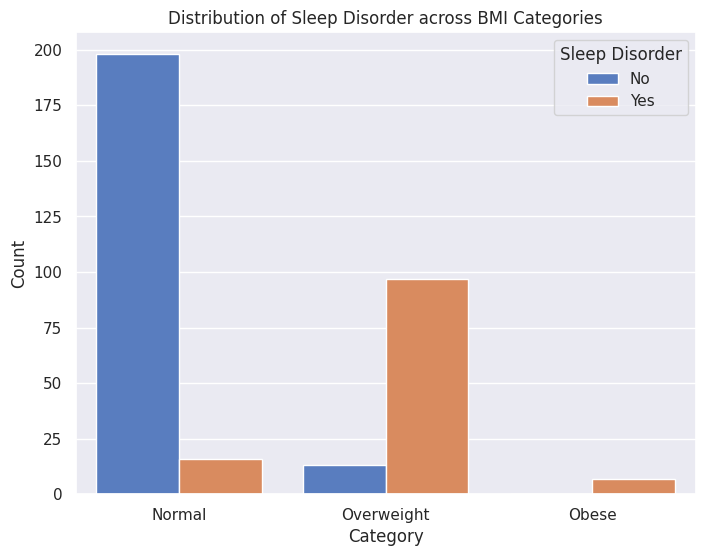

In [23]:
BMI_df = clean_df.copy()
BMI_df['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
BMI_df['Sleep Disorder'].replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1}, inplace=True)
category_order = ['Normal', 'Overweight', 'Obese']
plt.figure(figsize=(8, 6))
sns.countplot(data=BMI_df, x='BMI Category', hue='Sleep Disorder',palette = 'muted',order = category_order)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Sleep Disorder across BMI Categories')
plt.legend(title='Sleep Disorder', labels = ['No','Yes'])
plt.show()


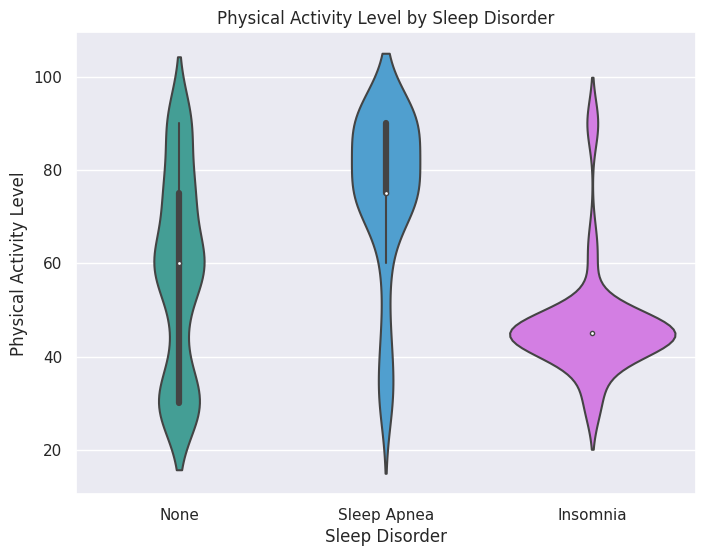

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Sleep Disorder', y='Physical Activity Level', palette=sns.husl_palette(h=.5))
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level by Sleep Disorder')
plt.show()